In [1]:
# 📊 notebooks/02_eda_detailed.ipynb
# Углубленный исследовательский анализ данных (EDA)
# для курсовой работы "Аналитическая система BMS"

print("="*70)
print("🔍 УГЛУБЛЕННЫЙ АНАЛИЗ ДАННЫХ (EXPLORATORY DATA ANALYSIS)")
print("="*70)

# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Библиотеки загружены и настроены")

🔍 УГЛУБЛЕННЫЙ АНАЛИЗ ДАННЫХ (EXPLORATORY DATA ANALYSIS)
✅ Библиотеки загружены и настроены


In [5]:
print("\n📂 ЗАГРУЗКА ДАННЫХ ДЛЯ УГЛУБЛЕННОГО АНАЛИЗА")
print("-"*50)

try:
    # Загружаем все файлы
    sensors = pd.read_csv('C:/Users/andre/Project_cybernetika/src/data/sensors_data.csv')
    energy = pd.read_csv('C:/Users/andre/Project_cybernetika/src/data/energy_data.csv')
    equipment = pd.read_csv('C:/Users/andre/Project_cybernetika/src/data/equipment_data.csv')
    
    print("✅ Данные успешно загружены:")
    print(f"   • sensors_data.csv: {len(sensors):,} записей")
    print(f"   • energy_data.csv: {len(energy):,} записей")
    print(f"   • equipment_data.csv: {len(equipment):,} записей")
    
    # Преобразуем даты
    sensors['timestamp'] = pd.to_datetime(sensors['timestamp'])
    energy['timestamp'] = pd.to_datetime(energy['timestamp'])
    equipment['timestamp'] = pd.to_datetime(equipment['timestamp'])
    
    print("\n📅 Периоды данных:")
    print(f"   • Датчики: {sensors['timestamp'].min()} до {sensors['timestamp'].max()}")
    print(f"   • Энергия: {energy['timestamp'].min()} до {energy['timestamp'].max()}")
    
except Exception as e:
    print(f"❌ Ошибка при загрузке: {e}")
    print("   Сначала запустите 01_data_generation.ipynb")


📂 ЗАГРУЗКА ДАННЫХ ДЛЯ УГЛУБЛЕННОГО АНАЛИЗА
--------------------------------------------------
✅ Данные успешно загружены:
   • sensors_data.csv: 5,040 записей
   • energy_data.csv: 336 записей
   • equipment_data.csv: 10,079 записей

📅 Периоды данных:
   • Датчики: 2024-01-01 00:00:00 до 2024-01-07 23:58:00
   • Энергия: 2024-01-01 00:00:00 до 2024-01-07 23:30:00


In [6]:
print("\n🧪 ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
print("-"*50)

# 1. Проверка пропусков
print("1. 📝 ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")

def check_missing(df, name):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    result = pd.DataFrame({
        'Пропусков': missing,
        '% пропусков': missing_pct
    })
    
    print(f"\n{name}:")
    issues = result[result['Пропусков'] > 0]
    if len(issues) > 0:
        display(issues)
    else:
        print("   ✅ Нет пропусков")

check_missing(sensors, "sensors_data.csv")
check_missing(energy, "energy_data.csv")
check_missing(equipment, "equipment_data.csv")

# 2. Проверка дубликатов
print("\n2. 🔄 ДУБЛИКАТЫ:")
print(f"   • sensors: {sensors.duplicated().sum()} дубликатов")
print(f"   • energy: {energy.duplicated().sum()} дубликатов")
print(f"   • equipment: {equipment.duplicated().sum()} дубликатов")


🧪 ПРОВЕРКА КАЧЕСТВА ДАННЫХ
--------------------------------------------------
1. 📝 ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:

sensors_data.csv:


,Пропусков,% пропусков
temperature,99,1.96
humidity,103,2.04
co2,99,1.96
light_level,95,1.88



energy_data.csv:
   ✅ Нет пропусков

equipment_data.csv:
   ✅ Нет пропусков

2. 🔄 ДУБЛИКАТЫ:
   • sensors: 0 дубликатов
   • energy: 0 дубликатов
   • equipment: 0 дубликатов



📊 СТАТИСТИЧЕСКИЙ АНАЛИЗ РАСПРЕДЕЛЕНИЙ
--------------------------------------------------


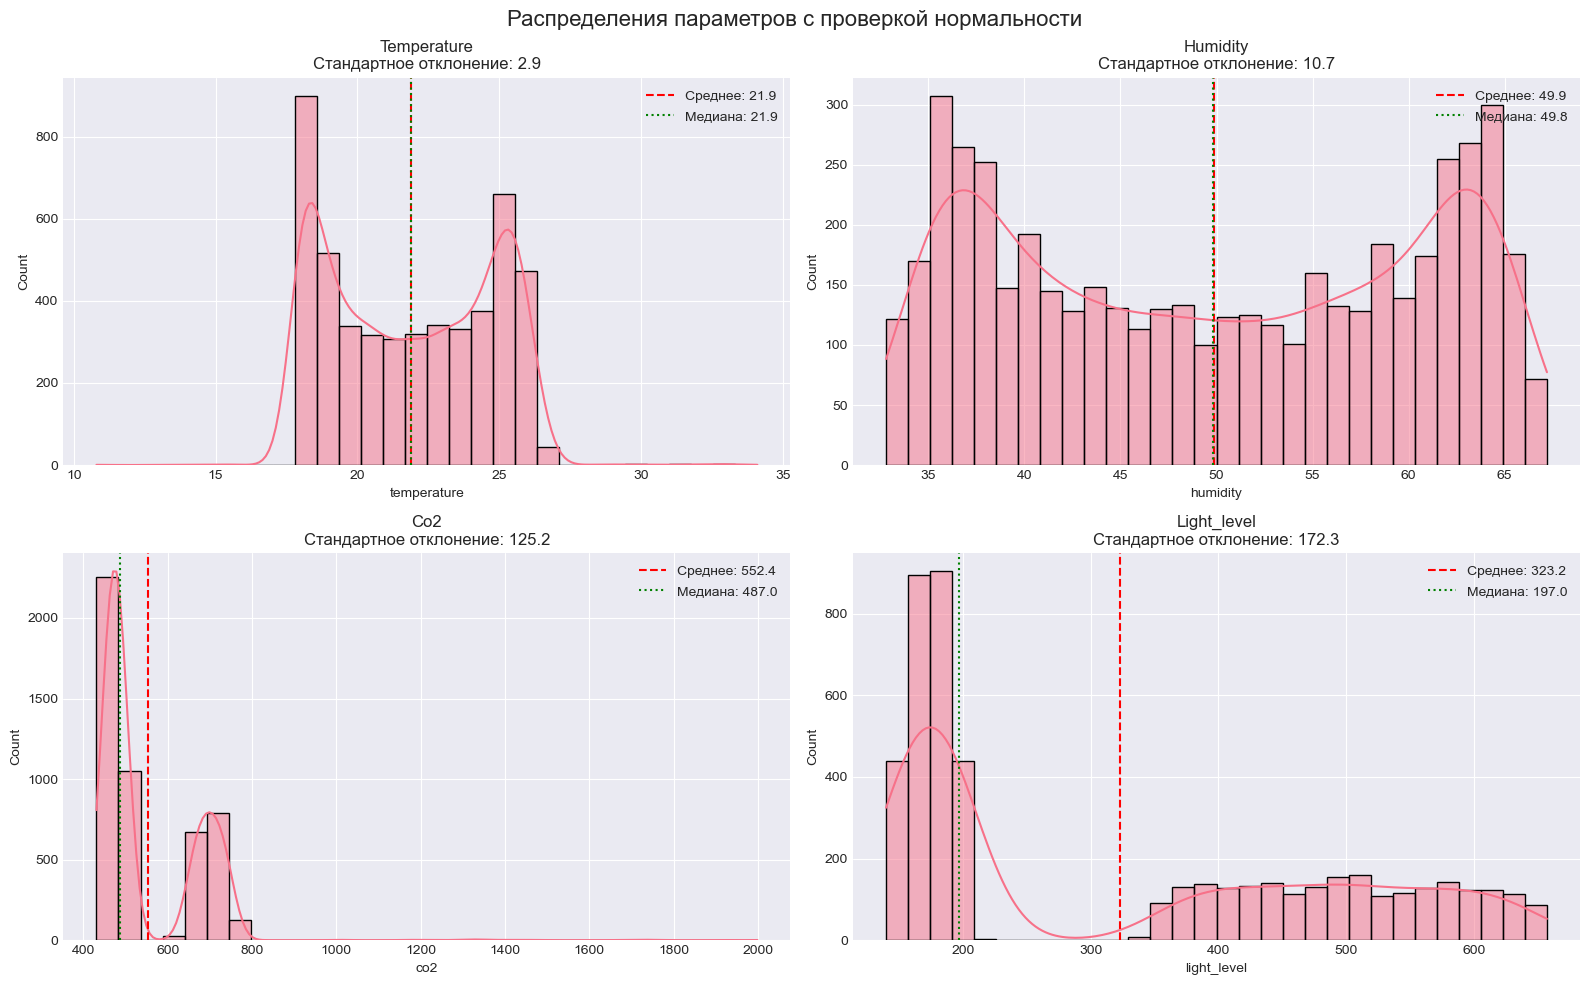

In [7]:
print("\n📊 СТАТИСТИЧЕСКИЙ АНАЛИЗ РАСПРЕДЕЛЕНИЙ")
print("-"*50)

# Анализ числовых колонок sensors
numeric_cols = ['temperature', 'humidity', 'co2', 'light_level']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Распределения параметров с проверкой нормальности', fontsize=16)

for idx, col in enumerate(numeric_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Гистограмма с KDE
    sns.histplot(sensors[col].dropna(), kde=True, ax=ax, bins=30)
    
    # Статистики
    mean = sensors[col].mean()
    median = sensors[col].median()
    std = sensors[col].std()
    
    # Проверка нормальности (тест Шапиро-Уилка)
    data_clean = sensors[col].dropna()
    if len(data_clean) > 3 and len(data_clean) < 5000:
        stat, p_value = stats.shapiro(data_clean.sample(min(5000, len(data_clean))))
        is_normal = p_value > 0.05
    else:
        is_normal = "Недостаточно данных для теста"
    
    # Добавляем линии среднего и медианы
    ax.axvline(mean, color='red', linestyle='--', label=f'Среднее: {mean:.1f}')
    ax.axvline(median, color='green', linestyle=':', label=f'Медиана: {median:.1f}')
    
    ax.set_title(f'{col.capitalize()}\nСтандартное отклонение: {std:.1f}')
    ax.set_xlabel(col)
    ax.legend()
    
    # Добавляем информацию о нормальности
    if isinstance(is_normal, bool):
        normal_text = "Нормальное" if is_normal else "Не нормальное"
        ax.text(0.05, 0.95, f'Распределение: {normal_text}', 
                transform=ax.transAxes, fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()


📈 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
--------------------------------------------------
1. 🔗 КОРРЕЛЯЦИИ МЕЖДУ ПАРАМЕТРАМИ ДАТЧИКОВ:


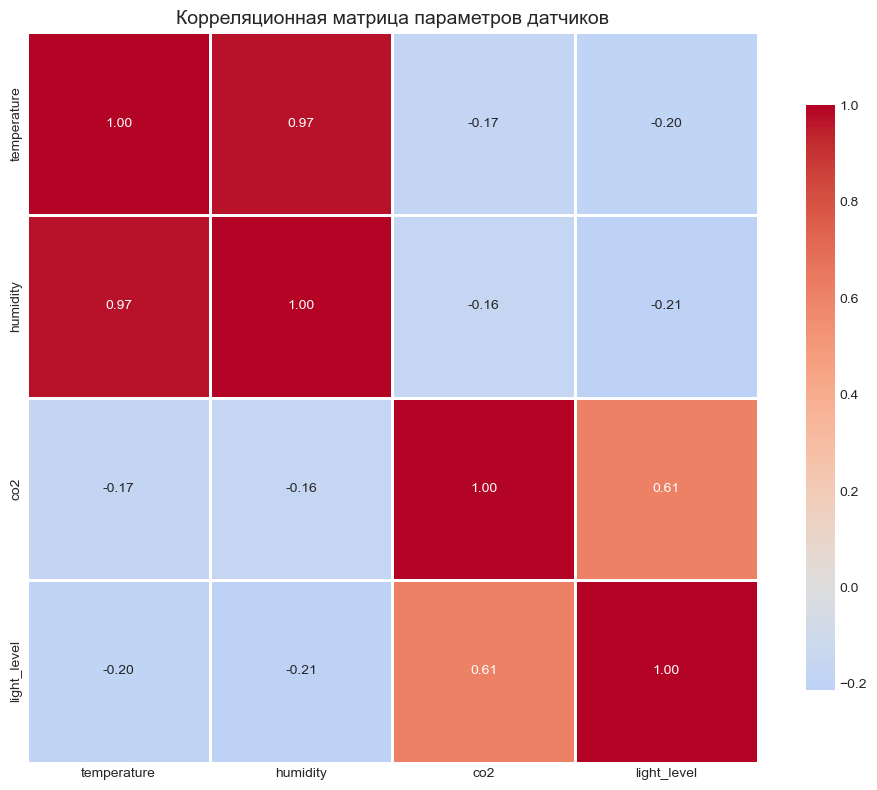


2. 🎯 СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| > 0.5):


,Параметр 1,Параметр 2,Корреляция,Связь
0,temperature,humidity,0.97,прямая (сильная)
1,co2,light_level,0.61,прямая (средняя)


In [8]:
print("\n📈 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("-"*50)

# Создаем сводную таблицу для корреляций
print("1. 🔗 КОРРЕЛЯЦИИ МЕЖДУ ПАРАМЕТРАМИ ДАТЧИКОВ:")

# Выбираем числовые колонки
numeric_data = sensors[['temperature', 'humidity', 'co2', 'light_level']]

# Рассчитываем корреляционную матрицу
corr_matrix = numeric_data.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица параметров датчиков', fontsize=14)
plt.tight_layout()
plt.show()

# Анализ сильных корреляций
print("\n2. 🎯 СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| > 0.5):")
strong_correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            relationship = "прямая" if corr_value > 0 else "обратная"
            strong_correlations.append({
                'Параметр 1': col1,
                'Параметр 2': col2,
                'Корреляция': f"{corr_value:.2f}",
                'Связь': f"{relationship} ({'сильная' if abs(corr_value) > 0.7 else 'средняя'})"
            })

if strong_correlations:
    strong_df = pd.DataFrame(strong_correlations)
    display(strong_df)
else:
    print("   ✅ Нет сильных корреляций между параметрами")


⏰ АНАЛИЗ ВРЕМЕННЫХ РЯДОВ
--------------------------------------------------
1. 📅 СЕЗОННОСТЬ ПО ЧАСАМ СУТОК:


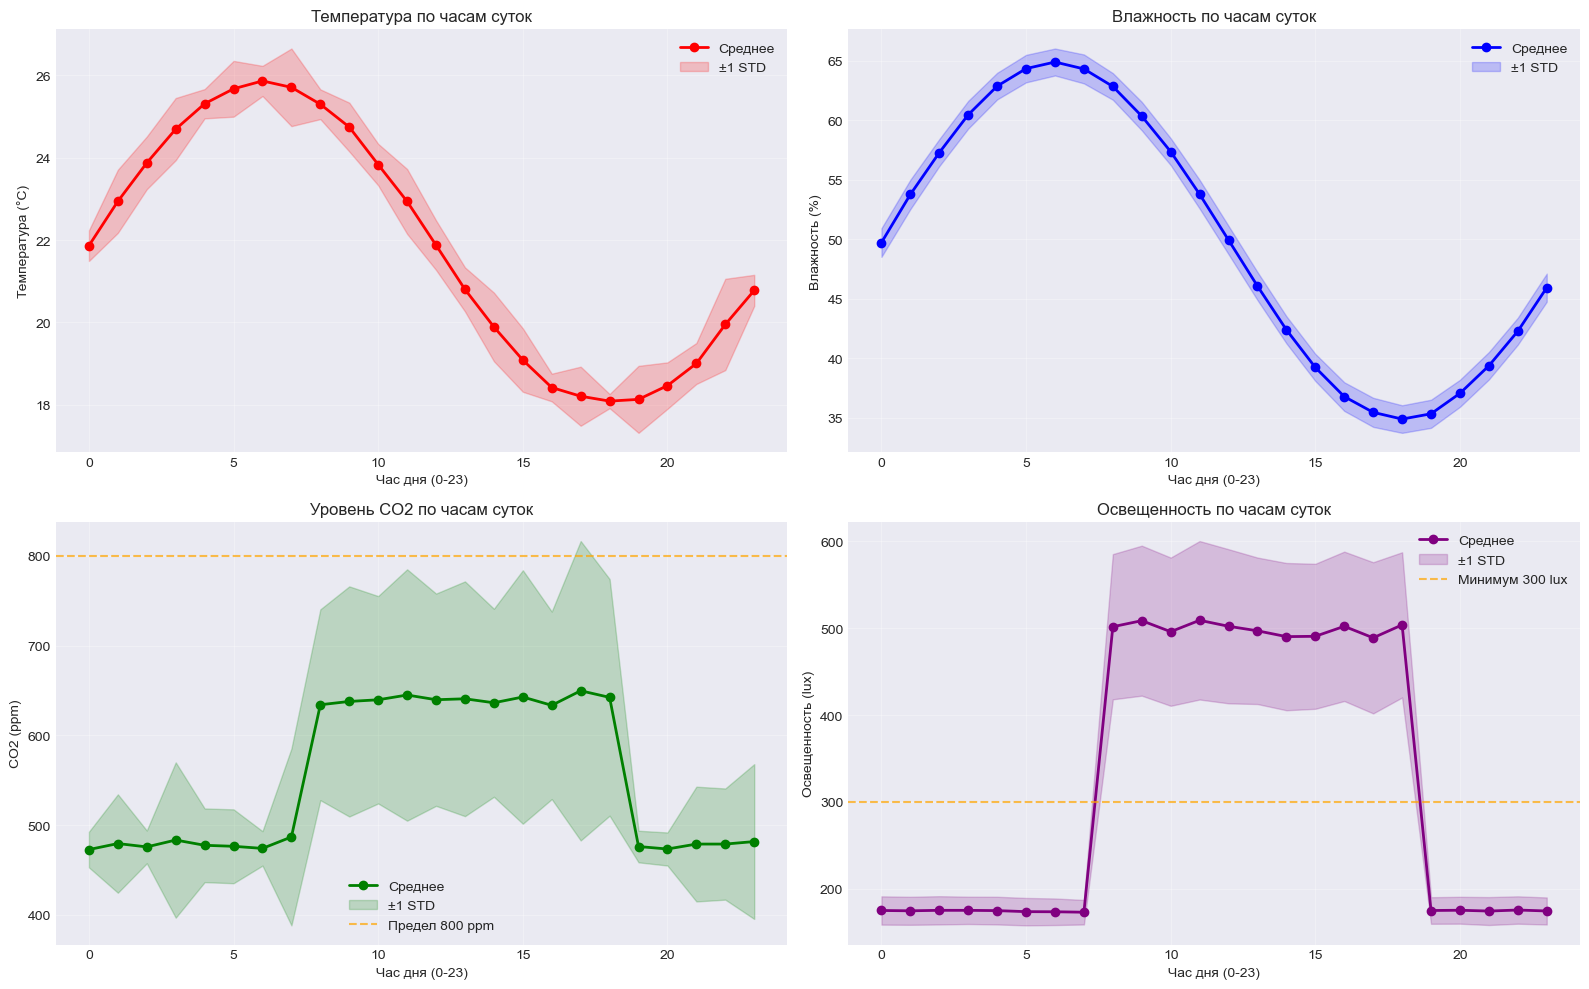

In [9]:
print("\n⏰ АНАЛИЗ ВРЕМЕННЫХ РЯДОВ")
print("-"*50)

# Создаем производные признаки времени
sensors['hour'] = sensors['timestamp'].dt.hour
sensors['day_of_week'] = sensors['timestamp'].dt.dayofweek  # 0=понедельник
sensors['is_weekend'] = sensors['day_of_week'].isin([5, 6]).astype(int)
sensors['month'] = sensors['timestamp'].dt.month

print("1. 📅 СЕЗОННОСТЬ ПО ЧАСАМ СУТОК:")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Температура по часам
temp_by_hour = sensors.groupby('hour')['temperature'].agg(['mean', 'std'])
axes[0, 0].plot(temp_by_hour.index, temp_by_hour['mean'], 
                marker='o', linewidth=2, color='red', label='Среднее')
axes[0, 0].fill_between(temp_by_hour.index, 
                       temp_by_hour['mean'] - temp_by_hour['std'],
                       temp_by_hour['mean'] + temp_by_hour['std'],
                       alpha=0.2, color='red', label='±1 STD')
axes[0, 0].set_title('Температура по часам суток', fontsize=12)
axes[0, 0].set_xlabel('Час дня (0-23)')
axes[0, 0].set_ylabel('Температура (°C)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Влажность по часам
hum_by_hour = sensors.groupby('hour')['humidity'].agg(['mean', 'std'])
axes[0, 1].plot(hum_by_hour.index, hum_by_hour['mean'], 
                marker='o', linewidth=2, color='blue', label='Среднее')
axes[0, 1].fill_between(hum_by_hour.index,
                       hum_by_hour['mean'] - hum_by_hour['std'],
                       hum_by_hour['mean'] + hum_by_hour['std'],
                       alpha=0.2, color='blue', label='±1 STD')
axes[0, 1].set_title('Влажность по часам суток', fontsize=12)
axes[0, 1].set_xlabel('Час дня (0-23)')
axes[0, 1].set_ylabel('Влажность (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# CO2 по часам
co2_by_hour = sensors.groupby('hour')['co2'].agg(['mean', 'std'])
axes[1, 0].plot(co2_by_hour.index, co2_by_hour['mean'], 
                marker='o', linewidth=2, color='green', label='Среднее')
axes[1, 0].fill_between(co2_by_hour.index,
                       co2_by_hour['mean'] - co2_by_hour['std'],
                       co2_by_hour['mean'] + co2_by_hour['std'],
                       alpha=0.2, color='green', label='±1 STD')
axes[1, 0].axhline(y=800, color='orange', linestyle='--', alpha=0.7, label='Предел 800 ppm')
axes[1, 0].set_title('Уровень CO2 по часам суток', fontsize=12)
axes[1, 0].set_xlabel('Час дня (0-23)')
axes[1, 0].set_ylabel('CO2 (ppm)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Освещенность по часам
light_by_hour = sensors.groupby('hour')['light_level'].agg(['mean', 'std'])
axes[1, 1].plot(light_by_hour.index, light_by_hour['mean'], 
                marker='o', linewidth=2, color='purple', label='Среднее')
axes[1, 1].fill_between(light_by_hour.index,
                       light_by_hour['mean'] - light_by_hour['std'],
                       light_by_hour['mean'] + light_by_hour['std'],
                       alpha=0.2, color='purple', label='±1 STD')
axes[1, 1].axhline(y=300, color='orange', linestyle='--', alpha=0.7, label='Минимум 300 lux')
axes[1, 1].set_title('Освещенность по часам суток', fontsize=12)
axes[1, 1].set_xlabel('Час дня (0-23)')
axes[1, 1].set_ylabel('Освещенность (lux)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🏢 СРАВНЕНИЕ: РАБОЧИЕ ДНИ VS ВЫХОДНЫЕ
--------------------------------------------------
📊 Статистика по дням:
   • Рабочих дней: 5
   • Выходных дней: 2
   • Записей в рабочие дни: 3,600
   • Записей в выходные: 1,440

📈 СРАВНЕНИЕ СРЕДНИХ ЗНАЧЕНИЙ:


,Параметр,Рабочие дни,Выходные,Разница,Изменение %
0,temperature,21.8,22.2,0.5,2.1%
1,humidity,49.7,50.2,0.5,1.0%
2,co2,583.1,475.8,-107.3,-18.4%
3,light_level,322.7,324.5,1.9,0.6%


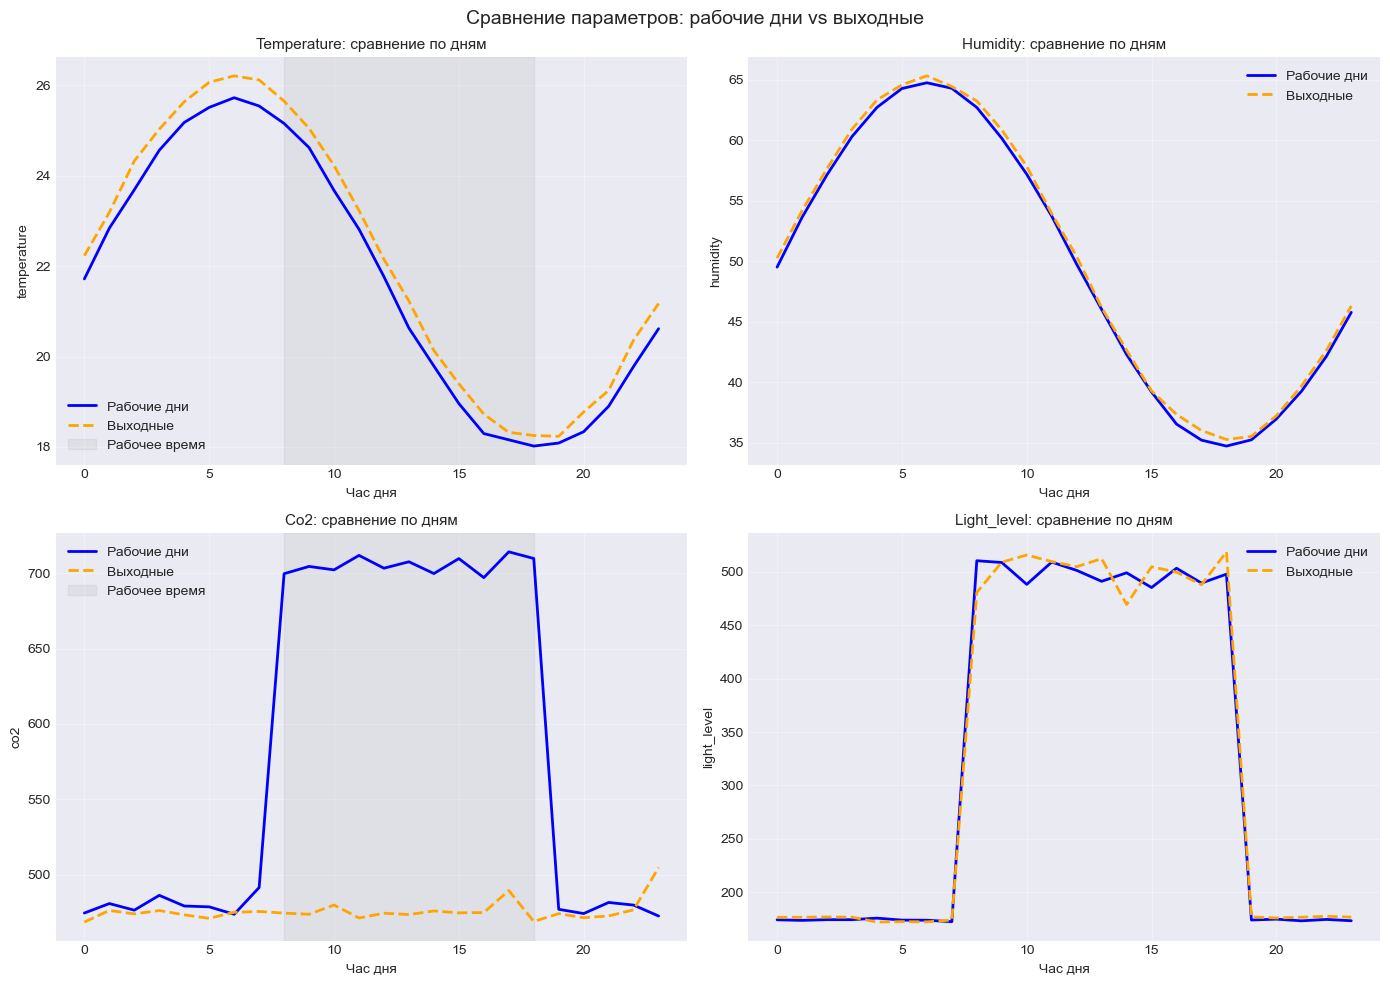

In [10]:
print("\n🏢 СРАВНЕНИЕ: РАБОЧИЕ ДНИ VS ВЫХОДНЫЕ")
print("-"*50)

# Разделяем данные
weekday_data = sensors[sensors['is_weekend'] == 0]
weekend_data = sensors[sensors['is_weekend'] == 1]

print(f"📊 Статистика по дням:")
print(f"   • Рабочих дней: {len(weekday_data['timestamp'].dt.date.unique())}")
print(f"   • Выходных дней: {len(weekend_data['timestamp'].dt.date.unique())}")
print(f"   • Записей в рабочие дни: {len(weekday_data):,}")
print(f"   • Записей в выходные: {len(weekend_data):,}")

# Сравниваем средние значения
comparison_stats = []

for col in ['temperature', 'humidity', 'co2', 'light_level']:
    weekday_mean = weekday_data[col].mean()
    weekend_mean = weekend_data[col].mean()
    difference = weekend_mean - weekday_mean
    diff_pct = (difference / weekday_mean * 100) if weekday_mean != 0 else 0
    
    comparison_stats.append({
        'Параметр': col,
        'Рабочие дни': f"{weekday_mean:.1f}",
        'Выходные': f"{weekend_mean:.1f}",
        'Разница': f"{difference:.1f}",
        'Изменение %': f"{diff_pct:.1f}%"
    })

comparison_df = pd.DataFrame(comparison_stats)
print("\n📈 СРАВНЕНИЕ СРЕДНИХ ЗНАЧЕНИЙ:")
display(comparison_df)

# Визуализация сравнения
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, col in enumerate(['temperature', 'humidity', 'co2', 'light_level']):
    ax = axes[idx // 2, idx % 2]
    
    # Группируем по часам
    weekday_by_hour = weekday_data.groupby('hour')[col].mean()
    weekend_by_hour = weekend_data.groupby('hour')[col].mean()
    
    ax.plot(weekday_by_hour.index, weekday_by_hour.values, 
            label='Рабочие дни', linewidth=2, color='blue')
    ax.plot(weekend_by_hour.index, weekend_by_hour.values, 
            label='Выходные', linewidth=2, color='orange', linestyle='--')
    
    # Добавляем заполнение для рабочего времени
    if idx == 0 or idx == 2:  # Для температуры и CO2
        ax.axvspan(8, 18, alpha=0.1, color='gray', label='Рабочее время')
    
    ax.set_title(f'{col.capitalize()}: сравнение по дням', fontsize=11)
    ax.set_xlabel('Час дня')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Сравнение параметров: рабочие дни vs выходные', fontsize=14)
plt.tight_layout()
plt.show()


🏢 АНАЛИЗ ПО ЗОНАМ ЗДАНИЯ
--------------------------------------------------
🎯 Обнаружено зон: 5
   Список зон: zone_1, zone_2, zone_3, zone_4, zone_5

📊 СТАТИСТИКА ПО ЗОНАМ:


,Зона,Записей,% от общего,Температура,Влажность,CO2,Освещенность
0,zone_1,1008,20.0%,21.9°C,49.9%,552 ppm,327 lux
1,zone_2,1008,20.0%,21.9°C,49.9%,551 ppm,320 lux
2,zone_3,1008,20.0%,21.9°C,49.9%,551 ppm,322 lux
3,zone_4,1008,20.0%,21.9°C,49.9%,555 ppm,325 lux
4,zone_5,1008,20.0%,21.9°C,49.8%,553 ppm,322 lux


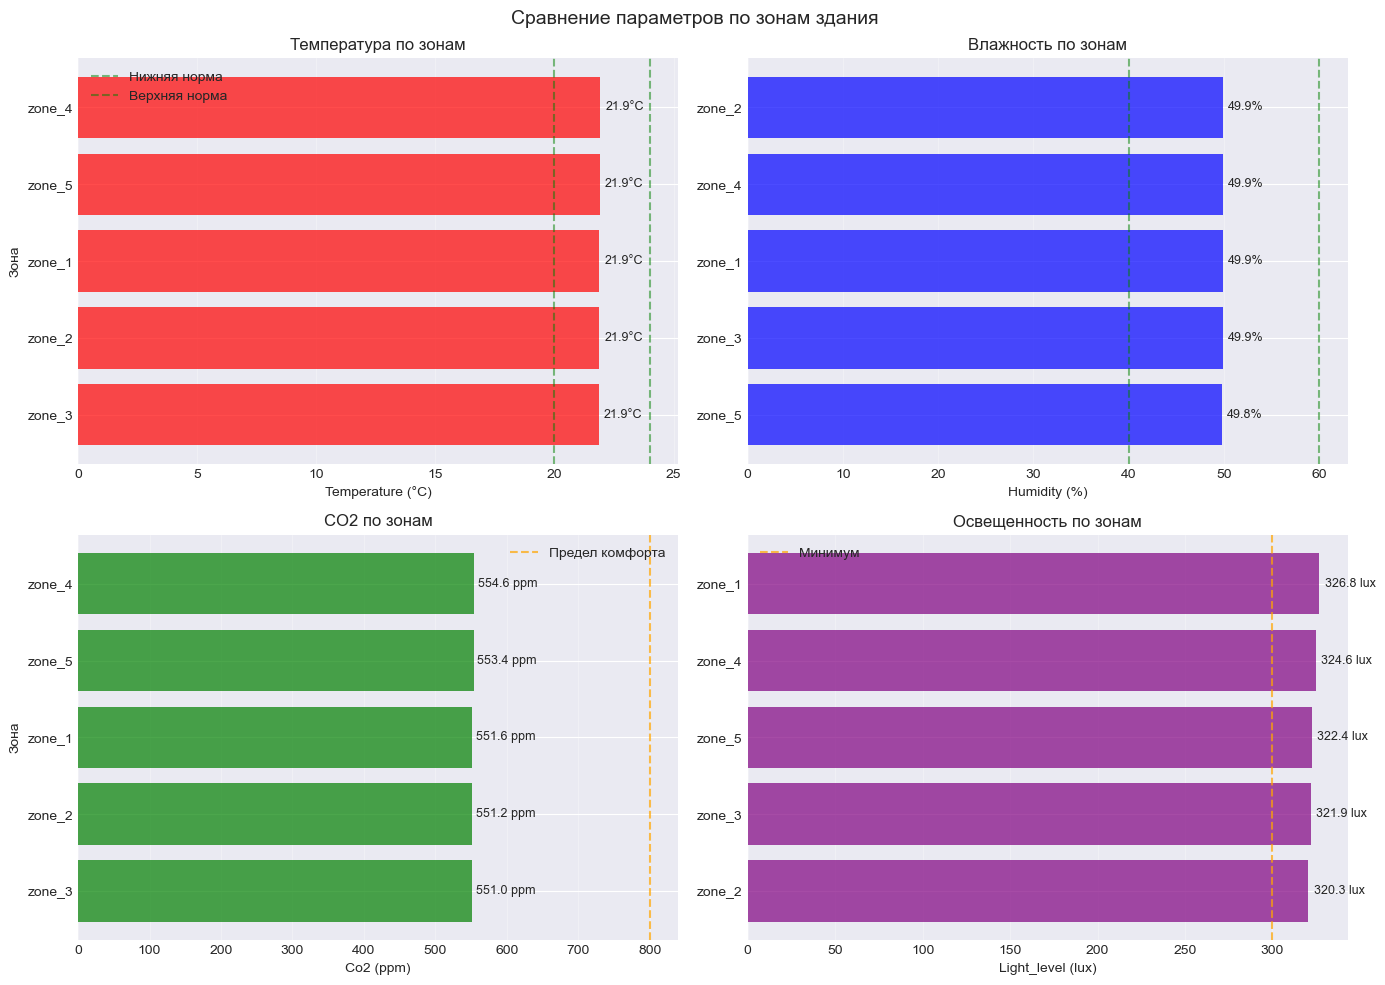

In [11]:
print("\n🏢 АНАЛИЗ ПО ЗОНАМ ЗДАНИЯ")
print("-"*50)

# Проверяем, есть ли колонка zone
if 'zone' in sensors.columns:
    zones = sensors['zone'].unique()
    print(f"🎯 Обнаружено зон: {len(zones)}")
    print(f"   Список зон: {', '.join(sorted(zones))}")
    
    # Статистика по зонам
    zone_analysis = []
    
    for zone in zones:
        zone_data = sensors[sensors['zone'] == zone]
        
        zone_analysis.append({
            'Зона': zone,
            'Записей': len(zone_data),
            '% от общего': f"{(len(zone_data)/len(sensors)*100):.1f}%",
            'Температура': f"{zone_data['temperature'].mean():.1f}°C",
            'Влажность': f"{zone_data['humidity'].mean():.1f}%",
            'CO2': f"{zone_data['co2'].mean():.0f} ppm",
            'Освещенность': f"{zone_data['light_level'].mean():.0f} lux"
        })
    
    zone_df = pd.DataFrame(zone_analysis)
    print("\n📊 СТАТИСТИКА ПО ЗОНАМ:")
    display(zone_df)
    
    # Визуализация различий между зонами
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    metrics = ['temperature', 'humidity', 'co2', 'light_level']
    titles = ['Температура по зонам', 'Влажность по зонам', 
              'CO2 по зонам', 'Освещенность по зонам']
    colors = ['red', 'blue', 'green', 'purple']
    units = ['°C', '%', 'ppm', 'lux']
    
    for idx, (metric, title, color, unit) in enumerate(zip(metrics, titles, colors, units)):
        ax = axes[idx // 2, idx % 2]
        
        # Группируем по зонам
        zone_means = sensors.groupby('zone')[metric].mean().sort_values()
        
        # Создаем bar plot
        bars = ax.barh(zone_means.index, zone_means.values, color=color, alpha=0.7)
        
        # Добавляем линии нормативных значений
        if metric == 'temperature':
            ax.axvline(x=20, color='green', linestyle='--', alpha=0.5, label='Нижняя норма')
            ax.axvline(x=24, color='green', linestyle='--', alpha=0.5, label='Верхняя норма')
        elif metric == 'humidity':
            ax.axvline(x=40, color='green', linestyle='--', alpha=0.5)
            ax.axvline(x=60, color='green', linestyle='--', alpha=0.5)
        elif metric == 'co2':
            ax.axvline(x=800, color='orange', linestyle='--', alpha=0.7, label='Предел комфорта')
        elif metric == 'light_level':
            ax.axvline(x=300, color='orange', linestyle='--', alpha=0.7, label='Минимум')
        
        # Добавляем значения на столбцы
        for bar in bars:
            width = bar.get_width()
            ax.text(width + (width * 0.01), bar.get_y() + bar.get_height()/2,
                   f'{width:.1f}{"" if unit == "°C" or unit == "%" else " "}{unit}',
                   ha='left', va='center', fontsize=9)
        
        ax.set_title(title, fontsize=12)
        ax.set_xlabel(f'{metric.capitalize()} ({unit})')
        if idx % 2 == 0:  # Только для левых графиков
            ax.set_ylabel('Зона')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='x')
    
    plt.suptitle('Сравнение параметров по зонам здания', fontsize=14)
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Колонка 'zone' не найдена в данных")


⚠️  ОБНАРУЖЕНИЕ АНОМАЛИЙ И ВЫБРОСОВ
--------------------------------------------------
1. 📊 МЕТОД IQR (МЕЖКВАРТИЛЬНЫЙ РАЗМАХ):
📈 СТАТИСТИКА АНОМАЛИЙ ПО МЕТОДУ IQR:


,Параметр,Всего значений,Аномалий,% аномалий,Нижняя граница,Верхняя граница,Тип аномалий
0,temperature,4941,1,0.02%,10.7,33.1,Слишком высокие
1,humidity,4937,0,0.00%,7.6,92.0,Слишком высокие
2,co2,4941,23,0.46%,159.0,983.0,Слишком высокие
3,light_level,4945,0,0.00%,-296.5,955.5,Слишком высокие



2. 📈 МЕТОД Z-SCORE:


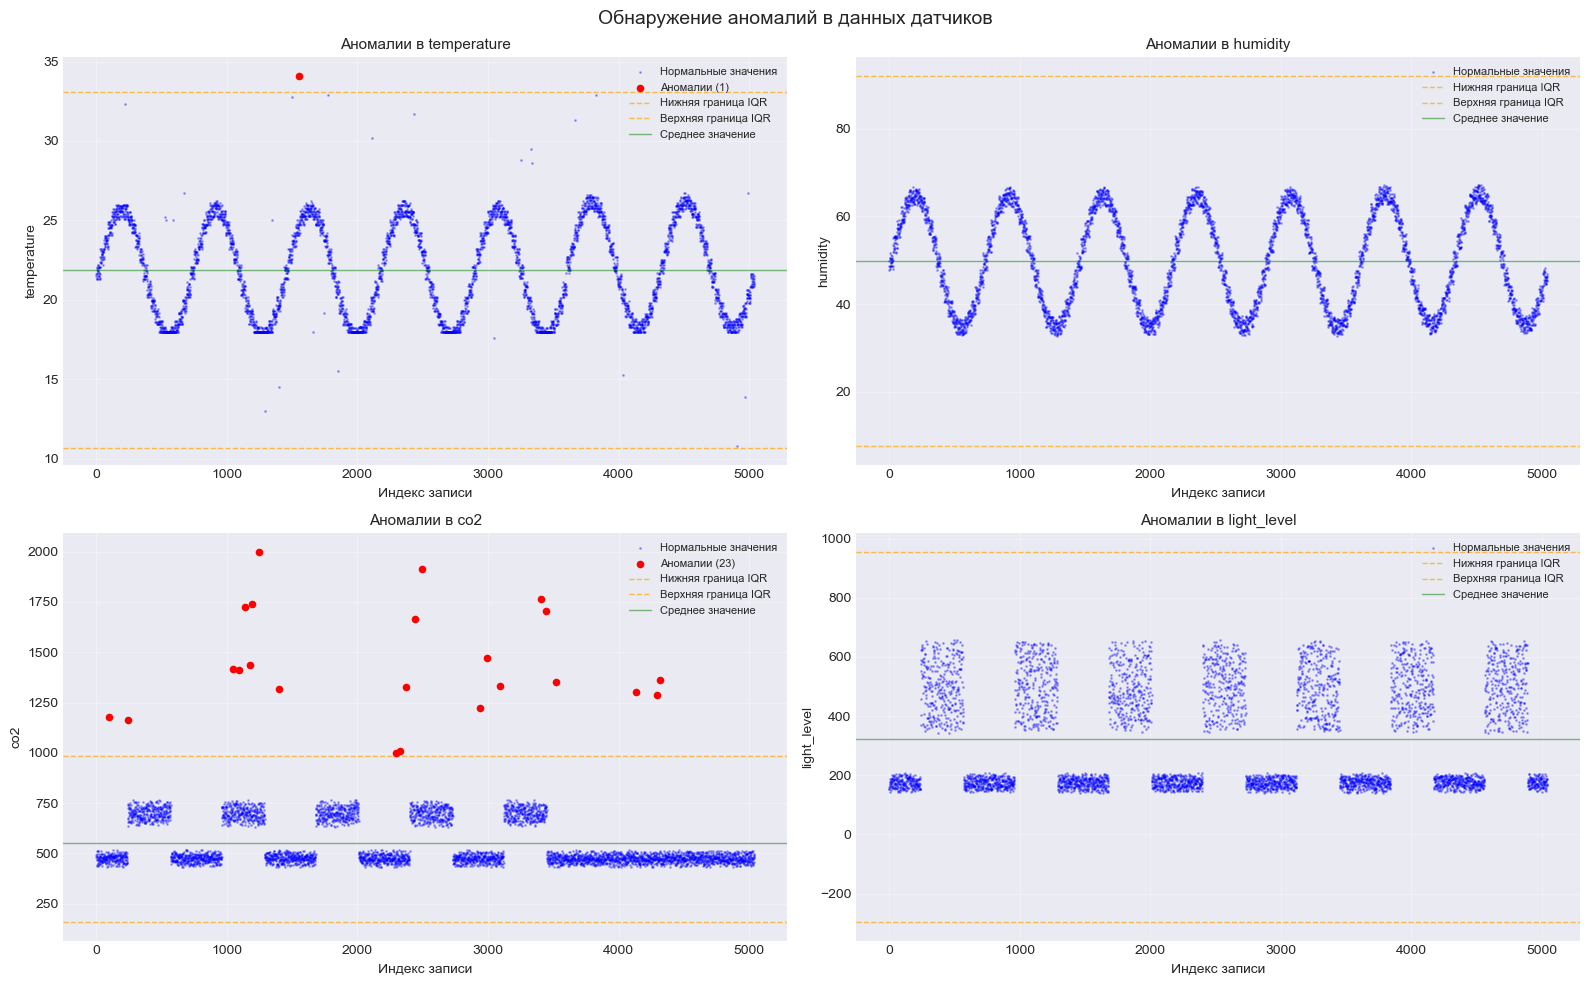

In [12]:
print("\n⚠️  ОБНАРУЖЕНИЕ АНОМАЛИЙ И ВЫБРОСОВ")
print("-"*50)

# Метод 1: Межквартильный размах (IQR)
print("1. 📊 МЕТОД IQR (МЕЖКВАРТИЛЬНЫЙ РАЗМАХ):")

def detect_anomalies_iqr(data, column):
    """Обнаружение аномалий методом IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    anomalies = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return anomalies, lower_bound, upper_bound

# Проверяем все числовые колонки
anomalies_summary = []

for col in ['temperature', 'humidity', 'co2', 'light_level']:
    anomalies, lower, upper = detect_anomalies_iqr(sensors, col)
    n_anomalies = len(anomalies)
    anomaly_pct = (n_anomalies / len(sensors)) * 100
    
    anomalies_summary.append({
        'Параметр': col,
        'Всего значений': len(sensors[col].dropna()),
        'Аномалий': n_anomalies,
        '% аномалий': f"{anomaly_pct:.2f}%",
        'Нижняя граница': f"{lower:.1f}",
        'Верхняя граница': f"{upper:.1f}",
        'Тип аномалий': 'Слишком низкие' if anomalies[col].mean() < sensors[col].mean() else 'Слишком высокие'
    })

anomalies_df = pd.DataFrame(anomalies_summary)
print("📈 СТАТИСТИКА АНОМАЛИЙ ПО МЕТОДУ IQR:")
display(anomalies_df)

# Метод 2: Z-score (стандартизированный показатель)
print("\n2. 📈 МЕТОД Z-SCORE:")

def detect_anomalies_zscore(data, column, threshold=3):
    """Обнаружение аномалий методом Z-score"""
    mean = data[column].mean()
    std = data[column].std()
    
    z_scores = np.abs((data[column] - mean) / std)
    anomalies = data[z_scores > threshold]
    
    return anomalies, z_scores

# Визуализация аномалий
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, col in enumerate(['temperature', 'humidity', 'co2', 'light_level']):
    ax = axes[idx // 2, idx % 2]
    
    # Рисуем все данные
    ax.scatter(range(len(sensors)), sensors[col], alpha=0.3, s=1, color='blue', label='Нормальные значения')
    
    # Находим аномалии IQR
    anomalies_iqr, lower, upper = detect_anomalies_iqr(sensors, col)
    
    if len(anomalies_iqr) > 0:
        anomaly_indices = anomalies_iqr.index
        ax.scatter(anomaly_indices, anomalies_iqr[col], 
                  color='red', s=20, label=f'Аномалии ({len(anomalies_iqr)})', zorder=5)
    
    # Добавляем границы
    ax.axhline(y=lower, color='orange', linestyle='--', alpha=0.7, linewidth=1, label='Нижняя граница IQR')
    ax.axhline(y=upper, color='orange', linestyle='--', alpha=0.7, linewidth=1, label='Верхняя граница IQR')
    
    # Добавляем среднюю линию
    ax.axhline(y=sensors[col].mean(), color='green', linestyle='-', alpha=0.5, linewidth=1, label='Среднее значение')
    
    ax.set_title(f'Аномалии в {col}', fontsize=11)
    ax.set_xlabel('Индекс записи')
    ax.set_ylabel(col)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('Обнаружение аномалий в данных датчиков', fontsize=14)
plt.tight_layout()
plt.show()


⚡ УГЛУБЛЕННЫЙ АНАЛИЗ ЭНЕРГОПОТРЕБЛЕНИЯ
--------------------------------------------------
1. 📊 АНАЛИЗ ПОТРЕБЛЕНИЯ ЭЛЕКТРОЭНЕРГИИ:
📈 ОБЩАЯ СТАТИСТИКА ПО ЭНЕРГИИ:


,electricity_kwh,heating_gcal,total_power_kw
count,336.000000,336.000000,336.000000
mean,84.344048,0.000405,168.688393
std,52.270505,0.005295,104.541584
min,13.540000,0.000000,27.070000
25%,31.030000,0.000000,62.057500
50%,86.700000,0.000000,173.405000
75%,112.892500,0.000000,225.790000
max,201.540000,0.078000,403.080000



💰 СУММАРНОЕ ПОТРЕБЛЕНИЕ ЗА ПЕРИОД:
   • Электроэнергия: 28,339.6 кВт·ч
   • Тепловая энергия: 0.1 Гкал

2. 📈 ПИКОВОЕ ПОТРЕБЛЕНИЕ:
   • Максимальное потребление: 201.5 кВт·ч
   • Время пика: 2024-01-06 08:30:00
   • Час пика: 8:00


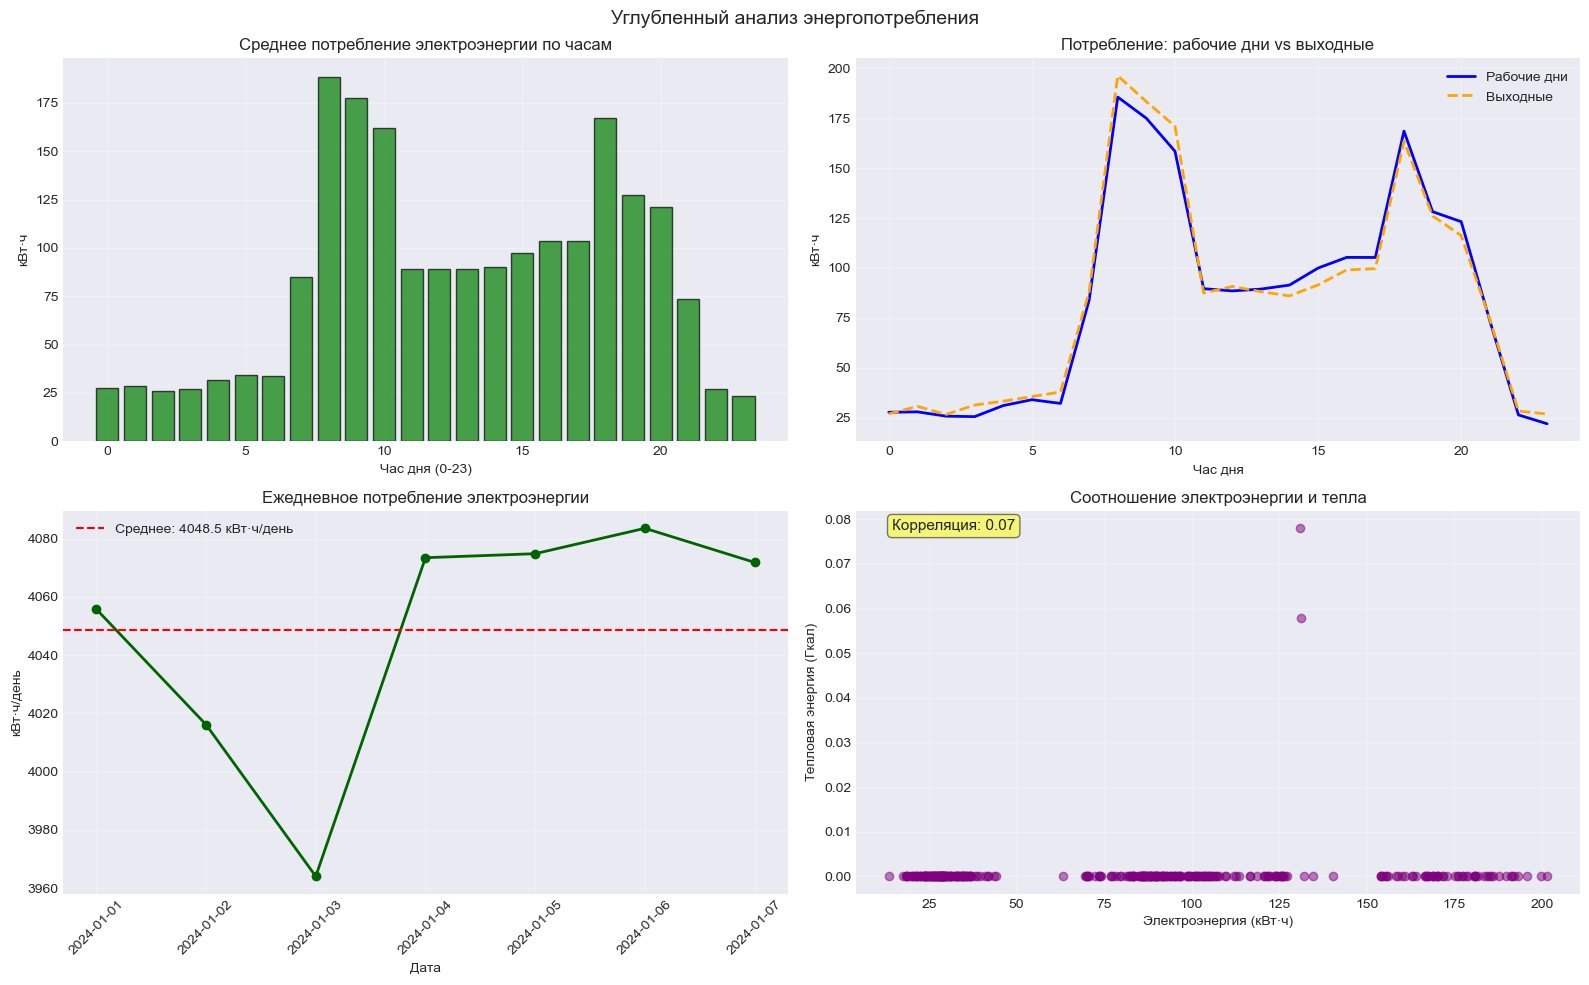

In [13]:
print("\n⚡ УГЛУБЛЕННЫЙ АНАЛИЗ ЭНЕРГОПОТРЕБЛЕНИЯ")
print("-"*50)

# Преобразуем energy данные
print("1. 📊 АНАЛИЗ ПОТРЕБЛЕНИЯ ЭЛЕКТРОЭНЕРГИИ:")

# Добавляем временные признаки
energy['hour'] = energy['timestamp'].dt.hour
energy['day_of_week'] = energy['timestamp'].dt.dayofweek
energy['is_weekend'] = energy['day_of_week'].isin([5, 6]).astype(int)

# Статистика по энергии
print("📈 ОБЩАЯ СТАТИСТИКА ПО ЭНЕРГИИ:")
energy_stats = energy[['electricity_kwh', 'heating_gcal', 'total_power_kw']].describe()
display(energy_stats)

print(f"\n💰 СУММАРНОЕ ПОТРЕБЛЕНИЕ ЗА ПЕРИОД:")
total_energy = energy['electricity_kwh'].sum()
total_heating = energy['heating_gcal'].sum()
print(f"   • Электроэнергия: {total_energy:,.1f} кВт·ч")
print(f"   • Тепловая энергия: {total_heating:,.1f} Гкал")

# Анализ пикового потребления
print("\n2. 📈 ПИКОВОЕ ПОТРЕБЛЕНИЕ:")
max_energy_idx = energy['electricity_kwh'].idxmax()
max_energy_time = energy.loc[max_energy_idx, 'timestamp']
max_energy_value = energy.loc[max_energy_idx, 'electricity_kwh']

print(f"   • Максимальное потребление: {max_energy_value:.1f} кВт·ч")
print(f"   • Время пика: {max_energy_time}")
print(f"   • Час пика: {max_energy_time.hour}:00")

# Визуализация энергопотребления
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Потребление по часам (все дни)
energy_by_hour = energy.groupby('hour').agg({
    'electricity_kwh': 'mean',
    'total_power_kw': 'mean'
}).reset_index()

axes[0, 0].bar(energy_by_hour['hour'], energy_by_hour['electricity_kwh'], 
               color='green', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Среднее потребление электроэнергии по часам', fontsize=12)
axes[0, 0].set_xlabel('Час дня (0-23)')
axes[0, 0].set_ylabel('кВт·ч')
axes[0, 0].grid(True, alpha=0.3)

# 2. Сравнение рабочих дней и выходных
weekday_energy = energy[energy['is_weekend'] == 0].groupby('hour')['electricity_kwh'].mean()
weekend_energy = energy[energy['is_weekend'] == 1].groupby('hour')['electricity_kwh'].mean()

axes[0, 1].plot(weekday_energy.index, weekday_energy.values, 
                label='Рабочие дни', linewidth=2, color='blue')
axes[0, 1].plot(weekend_energy.index, weekend_energy.values, 
                label='Выходные', linewidth=2, color='orange', linestyle='--')
axes[0, 1].set_title('Потребление: рабочие дни vs выходные', fontsize=12)
axes[0, 1].set_xlabel('Час дня')
axes[0, 1].set_ylabel('кВт·ч')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Ежедневное потребление
energy['date'] = energy['timestamp'].dt.date
daily_energy = energy.groupby('date')['electricity_kwh'].sum()

axes[1, 0].plot(daily_energy.index, daily_energy.values, 
                marker='o', linewidth=2, color='darkgreen')
axes[1, 0].axhline(y=daily_energy.mean(), color='red', linestyle='--', 
                   label=f'Среднее: {daily_energy.mean():.1f} кВт·ч/день')
axes[1, 0].set_title('Ежедневное потребление электроэнергии', fontsize=12)
axes[1, 0].set_xlabel('Дата')
axes[1, 0].set_ylabel('кВт·ч/день')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Соотношение электричества и тепла
axes[1, 1].scatter(energy['electricity_kwh'], energy['heating_gcal'], 
                   alpha=0.5, color='purple')
axes[1, 1].set_title('Соотношение электроэнергии и тепла', fontsize=12)
axes[1, 1].set_xlabel('Электроэнергия (кВт·ч)')
axes[1, 1].set_ylabel('Тепловая энергия (Гкал)')
axes[1, 1].grid(True, alpha=0.3)

# Рассчитываем корреляцию
correlation = energy['electricity_kwh'].corr(energy['heating_gcal'])
axes[1, 1].text(0.05, 0.95, f'Корреляция: {correlation:.2f}', 
                transform=axes[1, 1].transAxes, fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.5))

plt.suptitle('Углубленный анализ энергопотребления', fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
print("\n📋 ФИНАЛЬНЫЕ ВЫВОДЫ И ОТЧЕТ")
print("="*60)

# Создаем сводный отчет
summary_report = []

# 1. Температура
temp_mean = sensors['temperature'].mean()
temp_status = "✅ В НОРМЕ" if 20 <= temp_mean <= 24 else "⚠️ ВНИМАНИЕ"
temp_problems = len(sensors[(sensors['temperature'] < 18) | (sensors['temperature'] > 26)])

summary_report.append({
    'Параметр': 'Температура',
    'Среднее значение': f"{temp_mean:.1f}°C",
    'Статус': temp_status,
    'Проблемных записей': temp_problems,
    'Рекомендация': 'Настроить HVAC' if temp_mean > 24 or temp_mean < 20 else 'Поддерживать текущие настройки'
})

# 2. Влажность
hum_mean = sensors['humidity'].mean()
hum_status = "✅ В НОРМЕ" if 40 <= hum_mean <= 60 else "⚠️ ВНИМАНИЕ"
hum_problems = len(sensors[(sensors['humidity'] < 30) | (sensors['humidity'] > 70)])

summary_report.append({
    'Параметр': 'Влажность',
    'Среднее значение': f"{hum_mean:.1f}%",
    'Статус': hum_status,
    'Проблемных записей': hum_problems,
    'Рекомендация': 'Проверить вентиляцию' if hum_mean > 60 else 'Увлажнить воздух' if hum_mean < 40 else 'Хорошо'
})

# 3. CO2
co2_mean = sensors['co2'].mean()
co2_status = "✅ ХОРОШО" if co2_mean < 600 else "⚠️ НОРМАЛЬНО" if co2_mean < 800 else "❌ ПРОБЛЕМА"
co2_problems = len(sensors[sensors['co2'] > 800])

summary_report.append({
    'Параметр': 'CO2',
    'Среднее значение': f"{co2_mean:.0f} ppm",
    'Статус': co2_status,
    'Проблемных записей': co2_problems,
    'Рекомендация': 'Увеличить вентиляцию' if co2_mean > 800 else 'Поддерживать'
})

# 4. Освещенность
light_mean = sensors['light_level'].mean()
light_status = "✅ ХОРОШО" if light_mean >= 300 else "⚠️ МОЖНО ЛУЧШЕ" if light_mean >= 200 else "❌ ТЕМНО"
light_problems = len(sensors[sensors['light_level'] < 200])

summary_report.append({
    'Параметр': 'Освещенность',
    'Среднее значение': f"{light_mean:.0f} lux",
    'Статус': light_status,
    'Проблемных записей': light_problems,
    'Рекомендация': 'Добавить освещение' if light_mean < 300 else 'Хорошо'
})

# 5. Энергопотребление
energy_mean = energy['electricity_kwh'].mean()
peak_hour = energy.groupby('hour')['electricity_kwh'].mean().idxmax()
peak_value = energy.groupby('hour')['electricity_kwh'].mean().max()

summary_report.append({
    'Параметр': 'Энергопотребление',
    'Среднее значение': f"{energy_mean:.1f} кВт·ч",
    'Статус': f"Пик в {peak_hour}:00",
    'Проблемных записей': 'N/A',
    'Рекомендация': f'Сместить нагрузку с {peak_hour}:00'
})

# Создаем DataFrame отчета
summary_df = pd.DataFrame(summary_report)

print("📊 СВОДНЫЙ ОТЧЕТ ПО АНАЛИЗУ:")
print("="*60)
display(summary_df)

print("\n🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:")
print("-"*40)

# Считаем статусы
status_counts = summary_df['Статус'].value_counts()
for status, count in status_counts.items():
    print(f"• {status}: {count} параметров")

print(f"\n📈 ОБЩАЯ ОЦЕНКА СИСТЕМЫ:")
good_count = len(summary_df[summary_df['Статус'].str.contains('✅')])
total_count = len(summary_df)
score = (good_count / total_count) * 100

if score >= 80:
    rating = "⭐️⭐️⭐️⭐️⭐️ ОТЛИЧНО"
elif score >= 60:
    rating = "⭐️⭐️⭐️⭐️ ХОРОШО"
elif score >= 40:
    rating = "⭐️⭐️⭐️ УДОВЛЕТВОРИТЕЛЬНО"
else:
    rating = "⭐️⭐️ ТРЕБУЕТ УЛУЧШЕНИЙ"

print(f"   Оценка: {rating} ({score:.0f}%)")
print(f"   • Параметров в норме: {good_count} из {total_count}")

print(f"\n💡 РЕКОМЕНДАЦИИ ДЛЯ ОПТИМИЗАЦИИ:")
print("-"*40)

for _, row in summary_df.iterrows():
    if '⚠️' in row['Статус'] or '❌' in row['СтатуС']:
        print(f"• {row['Параметр']}: {row['Рекомендация']}")

# Сохраняем отчет
print(f"\n💾 СОХРАНЕНИЕ ОТЧЕТА...")

# Сохраняем в CSV
summary_df.to_csv('../data/detailed_analysis_report.csv', index=False, encoding='utf-8')

# Сохраняем текстовый отчет
with open('../data/analysis_summary.txt', 'w', encoding='utf-8') as f:
    f.write("="*60 + "\n")
    f.write("ОТЧЕТ ПО УГЛУБЛЕННОМУ АНАЛИЗУ ДАННЫХ УМНОГО ЗДАНИЯ\n")
    f.write("="*60 + "\n\n")
    
    f.write("КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:\n")
    f.write("-"*40 + "\n")
    
    for _, row in summary_df.iterrows():
        f.write(f"{row['Параметр']}: {row['Среднее значение']} - {row['Статус']}\n")
    
    f.write(f"\nОБЩАЯ ОЦЕНКА: {rating} ({score:.0f}%)\n")
    f.write(f"Параметров в норме: {good_count} из {total_count}\n\n")
    
    f.write("РЕКОМЕНДАЦИИ:\n")
    f.write("-"*40 + "\n")
    
    for _, row in summary_df.iterrows():
        if '⚠️' in row['Статус'] or '❌' in row['Статус']:
            f.write(f"• {row['Параметр']}: {row['Рекомендация']}\n")

print(f"✅ Отчеты сохранены:")
print(f"   • ../data/detailed_analysis_report.csv")
print(f"   • ../data/analysis_summary.txt")

print("\n" + "="*60)
print("🎉 УГЛУБЛЕННЫЙ АНАЛИЗ ДАННЫХ ЗАВЕРШЕН!")
print("="*60)


📋 ФИНАЛЬНЫЕ ВЫВОДЫ И ОТЧЕТ
📊 СВОДНЫЙ ОТЧЕТ ПО АНАЛИЗУ:


,Параметр,Среднее значение,Статус,Проблемных записей,Рекомендация
0,Температура,21.9°C,✅ В НОРМЕ,157,Поддерживать текущие настройки
1,Влажность,49.9%,✅ В НОРМЕ,0,Хорошо
2,CO2,552 ppm,✅ ХОРОШО,23,Поддерживать
3,Освещенность,323 lux,✅ ХОРОШО,2546,Хорошо
4,Энергопотребление,84.3 кВт·ч,Пик в 8:00,N/A,Сместить нагрузку с 8:00



🎯 КЛЮЧЕВЫЕ ВЫВОДЫ:
----------------------------------------
• ✅ В НОРМЕ: 2 параметров
• ✅ ХОРОШО: 2 параметров
• Пик в 8:00: 1 параметров

📈 ОБЩАЯ ОЦЕНКА СИСТЕМЫ:
   Оценка: ⭐️⭐️⭐️⭐️⭐️ ОТЛИЧНО (80%)
   • Параметров в норме: 4 из 5

💡 РЕКОМЕНДАЦИИ ДЛЯ ОПТИМИЗАЦИИ:
----------------------------------------


KeyError: 'СтатуС'